In [3]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text',usetex=True)
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

(None, None, None)

# Stack satellite/bkg/central catalogs

In [43]:
import glob
z_low = 0.3
z_high = 0.5
z_mean = round((z_low+z_high)/2,1)

# satellite (central aperture) catalog
file_list = glob.glob('CUT_deep_catalogs/satellite_catalogs/*.fits')
cat_stack = Table.read(file_list[0])
for filename in file_list[1:]:
    z_host = eval(filename.split('_')[-3])
    if z_host>z_low and z_host<z_high:
        cat=Table.read(filename)
        cat_stack = vstack([cat_stack,cat])

cat_stack.write('CUT_deep_catalogs/satellite_sample_total_'+str(round(z_mean,1))+'.fits',overwrite=True)

# contaminating object (background aperture) catalog
file_list = glob.glob('CUT_deep_catalogs/background_catalogs/*.fits')
cat_stack_bkg = Table.read(file_list[0])
for filename in file_list[1:]:
    z_host = eval(filename.split('_')[-2])
    if z_host>z_low and z_host<z_high:
        cat=Table.read(filename)
        cat_stack_bkg = vstack([cat_stack_bkg,cat])

cat_stack_bkg.write('CUT_deep_catalogs/background_sample_total_'+str(round(z_mean,1))+'.fits',overwrite=True)

# central galaxy catalog
file_list = glob.glob('CUT_deep_catalogs/massive_gal_positions/*.fits')
cat_stack_cen = Table.read(file_list[0])
for filename in file_list[1:]:
    if eval(filename.split('_')[-2])==z_mean:
        cat=Table.read(filename)
        cat_stack_cen = vstack([cat_stack_bkg,cat])

cat_stack_cen.write('CUT_deep_catalogs/central_sample_total_'+str(round(z_mean,1))+'.fits',overwrite=True)

In [44]:
z=0.4

cat_stack = Table.read('CUT_deep_catalogs/satellite_sample_total_'+str(z)+'.fits')
cat_stack_bkg = Table.read('CUT_deep_catalogs/background_sample_total_'+str(z)+'.fits')
cat_central = Table.read('CUT_deep_catalogs/central_sample_total_'+str(round(z_mean,1))+'.fits')

print(len(cat_stack))
print(len(cat_stack_bkg))
print(len(cat_central))

21023
10431
812


## sfProb Distribution

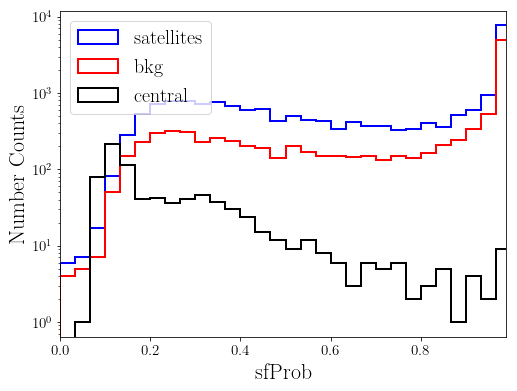

In [54]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))

sfprob_list = cat_stack['sfProb']
sfprob_list_bkg = cat_stack_bkg['sfProb']
sfprob_list_cen = cat_central['sfProb']

# a=np.histogram(sfprob_list, bins=np.arange(0,1.1,0.1))[0]
# b=np.histogram(sfprob_list_bkg, bins=np.arange(0,1.1,0.1))[0]
# print(a-b)
# plt.plot(np.arange(0,1.1,0.1)[:-1]+0.05,a-b)

plt.hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
plt.hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='bkg')
plt.hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')

plt.ylabel('Number Counts',fontsize=22)
plt.xlabel(r'sfProb',fontsize=22)
plt.xlim([0,0.99])
plt.yscale('log')
plt.legend(fontsize=20,loc='upper left')
plt.savefig('figures/sfprob_hist.png')
plt.show()

## mass distribution

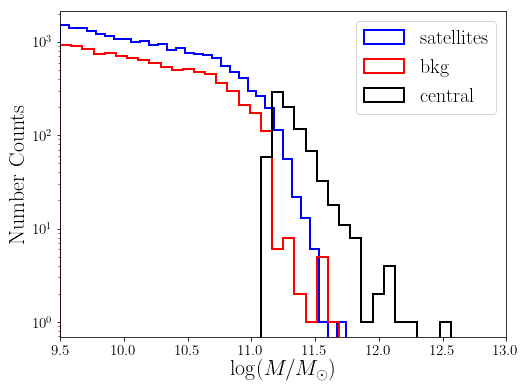

In [58]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))

mass_list = cat_stack['MASS_MED']
mass_list_bkg = cat_stack_bkg['MASS_MED']
mass_list_cen = cat_central['MASS_MED']

plt.hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,label='satellites')
plt.hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=40,label='bkg')
plt.hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=40,label='central')

plt.ylabel('Number Counts',fontsize=22)
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=22)
plt.yscale('log')
plt.xlim([9.5,13])
plt.legend(fontsize=20,loc='upper right')
plt.savefig('figures/mass_hist.png')
plt.show()

sfprob - mass plots

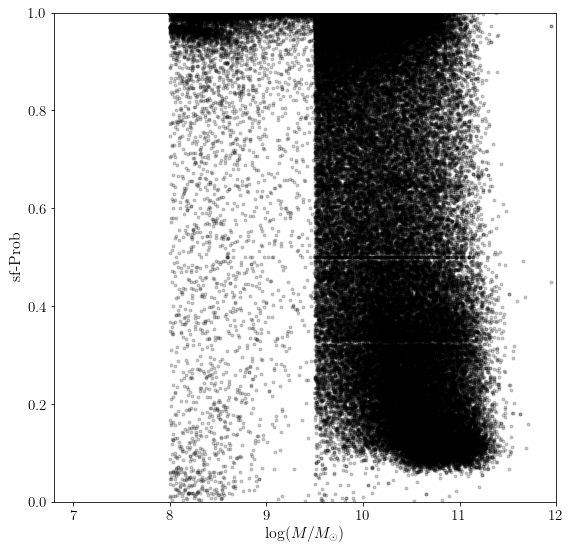

In [102]:
fig = plt.figure(figsize=(9,9))
plt.scatter(mass_list,sfprob_list,marker='.',color='k',alpha=0.2)
plt.xlim([6.8,12])
plt.ylim([0,1])
plt.xlabel('$\log(M/M_\odot)$',fontsize=16)
plt.ylabel('sf-Prob',fontsize=16)
# plt.savefig('figures/mass_sfprob.png',dpi=200)
plt.show()

In [66]:
cata = Table.read('CUT_deep_catalogs/massive_gal_positions/isolated_COSMOS_deep_11.15_0.4.positions.fits')
cata.info()

<Table length=520>
         name           dtype  n_bad
---------------------- ------- -----
                NUMBER   int64     0
                    RA float64     0
                   DEC float64     0
                 FIELD  bytes6     0
                 TRACT   int64     0
                 PATCH  bytes3     0
            miniNumber   int64     0
   MegaCam_u_EB_V_corr float32     0
  MegaCam_uS_EB_V_corr float32     0
       HSC_G_EB_V_corr float32     0
       HSC_R_EB_V_corr float32     0
       HSC_I_EB_V_corr float32     0
       HSC_Z_EB_V_corr float32     0
       HSC_Y_EB_V_corr float32     0
              meanCorr float64     0
           meanCorrErr float64     0
    FLUX_TOT_MegaCam_u float64     0
 FLUXERR_TOT_MegaCam_u float64     1
   FLUX_TOT_MegaCam_uS float64     0
FLUXERR_TOT_MegaCam_uS float64     0
        FLUX_TOT_HSC_G float64     0
     FLUXERR_TOT_HSC_G float64     0
        FLUX_TOT_HSC_R float64     0
     FLUXERR_TOT_HSC_R float64     0
        FLUX_TOT_HS